<a href="https://colab.research.google.com/github/Saranyanv/test/blob/master/Reducing%20Commercial%20Aviation%20Fatalities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**REDUCING COMMERCIAL AVIATION FATALITIES**

*https://www.kaggle.com/c/reducing-commercial-aviation-fatalities/data*

In [0]:
import os 
import numpy as np
import zipfile
from tqdm import tqdm
from matplotlib import pyplot as plt
from pandas import DataFrame
import pandas as pd
import seaborn as sns
RANDOM_SEED = 42

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls -l "drive/My Drive/MyWork/Kaggle/Reducing Commercial Aviation Fatalities"

total 439092
-rw------- 1 root root 449629430 Mar 17 03:41 train.csv.zip


In [4]:
!unzip "drive/My Drive/MyWork/Kaggle/Reducing Commercial Aviation Fatalities/train.csv.zip"

Archive:  drive/My Drive/MyWork/Kaggle/Reducing Commercial Aviation Fatalities/train.csv.zip
  inflating: train.csv               


In [3]:
!ls -lrt /content/

total 1205840
---------- 1 root root 1234764001 Dec 14 23:11 train.csv
drwxr-xr-x 1 root root       4096 Apr  4 20:20 sample_data
drwx------ 3 root root       4096 Apr 12 01:39 drive


In [0]:
#train_df = pd.read_csv('train.csv', delim_whitespace=False, names=('id', 'crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr', 'event'))
train_df = pd.read_csv('train.csv', header=0, dtype={'crew': np.int32, 'experiment' :str, 'time': np.float64, 'seat': np.int32, 'eeg_fp1': np.float64, 'eeg_f7': np.float64, 'eeg_f8': np.float64, 'eeg_t4': np.float64, 'eeg_t6': np.float64, 'eeg_t5': np.float64, 'eeg_t3': np.float64, 'eeg_fp2': np.float64, 'eeg_o1': np.float64, 'eeg_p3': np.float64, 'eeg_pz': np.float64, 'eeg_f3': np.float64, 'eeg_fz': np.float64, 'eeg_f4': np.float64, 'eeg_c4': np.float64, 'eeg_p4': np.float64, 'eeg_poz': np.float64, 'eeg_c3': np.float64, 'eeg_cz': np.float64, 'eeg_o2': np.float64, 'ecg': np.float64, 'r': np.float64, 'gsr': str, 'event': str})

In [18]:
len(train_df)

4867421

In [73]:
train_df.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,None,CA,0.01,1,-5.29,26.78,-9.53,-12.79,16.72,33.74,...,37.37,17.44,19.20,20.60,-3.95,14.51,-4520.00,817.71,388.829987,A
1,None,CA,0.02,1,-2.43,28.43,-9.32,-3.76,15.97,30.44,...,31.17,19.40,19.69,21.35,1.33,17.75,-4520.00,817.71,388.829987,A
2,None,CA,0.02,1,10.67,30.42,15.35,24.72,16.14,32.14,...,-12.01,19.40,23.17,22.41,1.54,22.25,-4520.00,817.71,388.829987,A
3,None,CA,0.02,1,11.45,25.61,2.43,12.41,20.53,31.49,...,18.57,23.16,22.64,19.34,2.54,19.00,-4520.00,817.71,388.829987,A
4,None,CA,0.03,1,7.28,25.94,0.11,5.75,19.83,28.75,...,6.56,22.75,22.67,20.29,1.70,22.81,-4520.00,817.71,388.829987,A


In [0]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [72]:
train_df.crew.value_counts()

Series([], Name: crew, dtype: int64)

In [0]:
train_df['crew'] = train_df['crew'].apply({'1': 'crew_1', '2': 'crew_2', '3': 'crew_3', '4': 'crew_4', '5': 'crew_5'
                                        , '6': 'crew_6', '7': 'crew_7', '8': 'crew_8', '13': 'crew_13'}.get)

In [0]:
class_variance=train_df.groupby('event').agg({'eeg_fp1': np.var, 'eeg_f7': np.var, 'eeg_f8': np.var, 'eeg_t4': np.var, 'eeg_t6': np.var, 'eeg_t5': np.var, 'eeg_t3': np.var
, 'eeg_fp2': np.var, 'eeg_o1': np.var, 'eeg_p3': np.var, 'eeg_pz': np.var, 'eeg_f3': np.var, 'eeg_fz': np.var, 'eeg_f4': np.var
, 'eeg_c4': np.var, 'eeg_p4': np.var, 'eeg_poz': np.var, 'eeg_c3': np.var, 'eeg_cz': np.var, 'eeg_o2': np.var, 'ecg': np.var, 'r': np.var})

In [13]:
class_variance

,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,...,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r
event,,,,,,,,,,,,,,,,,,,,,
A,2558.38,1659.03,1746.00,786.34,372.84,427.71,859.75,2659.70,1209.93,338.02,...,4753.73,2296.38,523.93,338.41,449.20,483.36,452.67,818.01,139176188.18,6748.07
B,5324.43,2716.48,1102.47,446.15,339.79,258.64,466.29,5616.85,481.72,232.32,...,2436.07,1502.79,485.90,280.69,239.00,473.87,369.25,522.91,130060628.69,6204.59
C,941.97,477.66,411.27,294.10,252.97,191.63,317.92,993.22,159.19,167.15,...,361.20,993.03,241.63,165.18,155.53,223.48,267.07,140.93,160741572.19,6593.17
D,1431.14,659.16,977.81,395.95,252.15,279.32,351.77,1742.18,269.08,292.25,...,709.08,972.07,400.50,288.35,292.68,388.78,505.62,257.84,150255397.86,7227.80


In [0]:
#fig, ax = plt.subplots(figsize=(14, 8))
#sns.countplot(x='event', data=train_df, palette='hls')

In [12]:
train_df.isnull().sum().sum()

0

In [0]:
#data cleaning start with matrix of histogram with seaborn

In [0]:
import matplotlib.pyplot as plt
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [0]:
rand_clf = GradientBoostingClassifier(n_estimators=100, max_features='auto', random_state=42)
#rand_clf = XGBClassifier(n_estimators=100, max_features='auto', random_state=42)

In [0]:
x_train=train_df[['eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r']][0:50000]
y_train=train_df['event'][0:50000]

In [31]:
rand_clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [0]:
y=list(rand_clf.predict(train_df[['eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r']][50001:55112]))

In [0]:
y

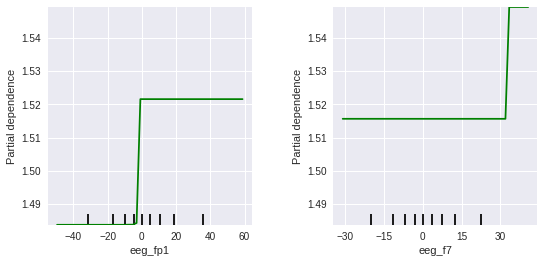

In [34]:
features = [0,1]
plot = plot_partial_dependence(rand_clf, x_train, features,
                                       feature_names=['eeg_fp1','eeg_f7'],
                                       n_jobs=3, grid_resolution=50)

In [33]:
y_train.value_counts()

C    49026
A      974
Name: event, dtype: int64